# **Podstawowe przetwarzanie obrazów**
## Zadanie 1

Median blur, mask_size:  3 PSNR:  27.6686435509258


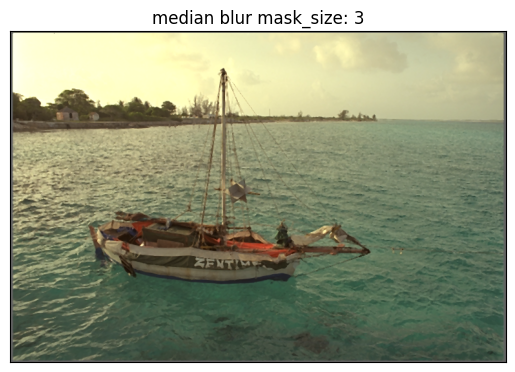

Gauss blur, mask_size:  3 PSNR:  27.080166741311235


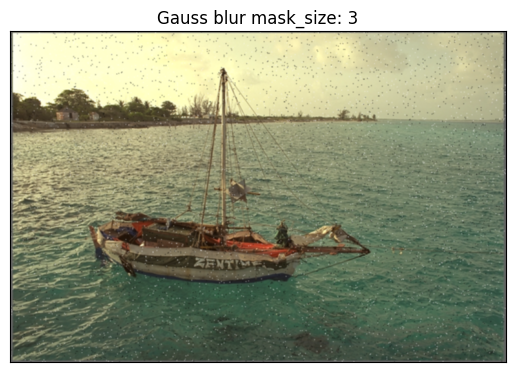

Median blur, mask_size:  5 PSNR:  24.475090172742885


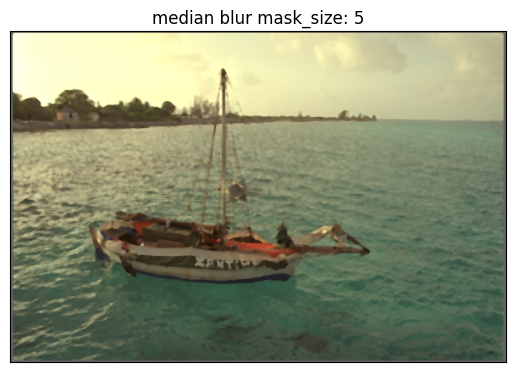

Gauss blur, mask_size:  5 PSNR:  26.03555438042422


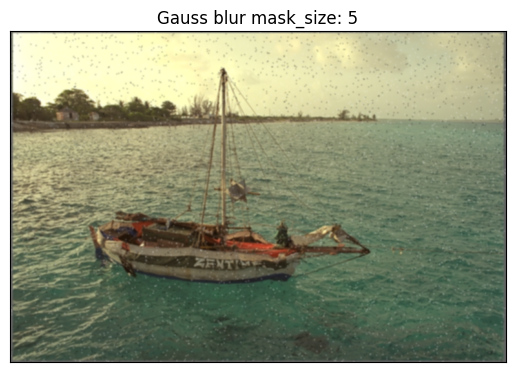

Median blur, mask_size:  7 PSNR:  23.674851900458687


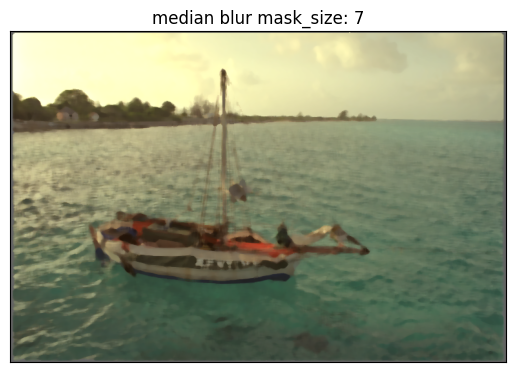

Gauss blur, mask_size:  7 PSNR:  24.934457958736104


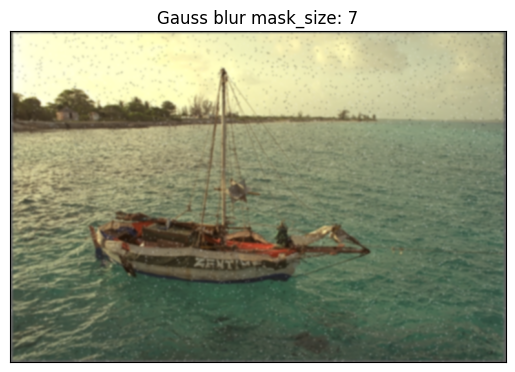

PSNR_results:  [np.float64(27.6686435509258), np.float64(27.080166741311235), np.float64(24.475090172742885), np.float64(26.03555438042422), np.float64(23.674851900458687), np.float64(24.934457958736104)]


In [20]:
import time 
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### dane w lokalnym folderze - uruchamianie skrytpu .py w lokalnym środowisku
data_dir = "./"

# wczytanie obrazów zadanych przez polecenie (dla mojego indeksu 331386 nr obrazu 6)
image_original = cv2.imread(data_dir+"boat_col.png", cv2.IMREAD_UNCHANGED)
image_impulse = cv2.imread(data_dir+"boat_col_inoise.png", cv2.IMREAD_UNCHANGED)
image_gauss = cv2.imread(data_dir+"boat_col_noise.png", cv2.IMREAD_UNCHANGED)

mask_sizes = [3, 5, 7]
PSNR_results = []

def cv_imshow(img, img_title="image"):
    # cv2.namedWindow(img_title, cv2.WINDOW_AUTOSIZE)  # cv2.WINDOW_NORMAL
   
    ##### przeskalowanie obrazu z rzeczywistymi wartościami pikseli, żeby jedną funkcją wywietlać obrazy różnych typów
    if (img.dtype == np.float32) or (img.dtype == np.float64):
        img_ = img/255
    else:
        img_ = img
    cv2.imshow(img_title, img_)
    cv2.waitKey(1)  ### oczekiwanie przez bardzo krótki czas - okno się wyświetli, ale program się nie zablokuje, tylko będzie kontynuowany

def plt_imshow(img, img_title="image"):
    plt.figure() 
    plt.title(img_title) 
    # plt.imshow(img, cmap = "gray")  ### możliwe automatyczne skalowanie wartości pikseli
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)  ### bez skalowania wartości pikseli
    plt.xticks([]), plt.yticks([])
    plt.show()

def calcPSNR(img1, img2):
    imax = 255.**2  ### zakładana wartość pikseli z przedziału [0, 255]
    ##### w różnicy obrazów istotne są wartości ujemne, dlatego img1 konwertowany do typu np.float64 (liczby rzeczywiste) aby nie ograniczać wyniku do przedziału [0, 255]
    mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size  ### img1.size - liczba elementów w img1, ==img1.shape[0]*img1.shape[1] dla obrazów mono, ==img1.shape[0]*img1.shape[1]*img1.shape[2] dla obrazów barwnych
    return 10.0*np.log10(imax/mse)

for mask_size in mask_sizes:
    image_impulse_filtered = cv2.medianBlur(image_impulse, mask_size)
    image_gauss_filtered = cv2.GaussianBlur(image_impulse, (mask_size, mask_size), 0)
    PSNR = calcPSNR(image_original, image_impulse_filtered)
    PSNR_results.append(PSNR)
    print("Median blur, mask_size: ", mask_size, "PSNR: ", PSNR)
    plt_imshow(image_impulse_filtered, "median blur mask_size: "+str(mask_size))
    PSNR = calcPSNR(image_original, image_gauss_filtered)
    PSNR_results.append(PSNR)
    print("Gauss blur, mask_size: ", mask_size, "PSNR: ", PSNR)
    plt_imshow(image_gauss_filtered, "Gauss blur mask_size: "+str(mask_size))
print ("PSNR_results: ", PSNR_results)



## **Zadanie 2**

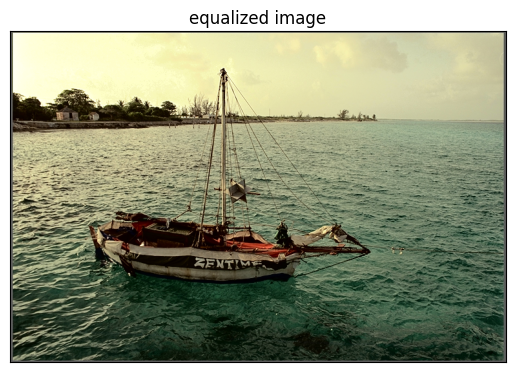

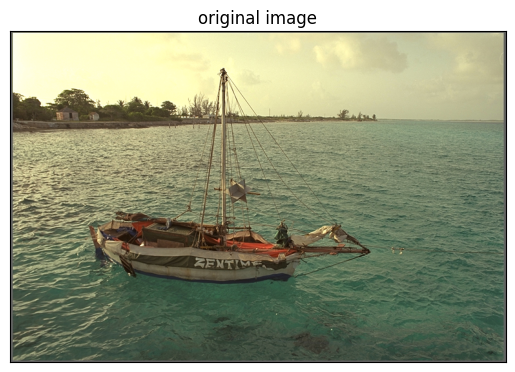

In [26]:
# change color image to YCbCr
image_original_YCbCr = cv2.cvtColor(image_original, cv2.COLOR_BGR2YCrCb)

image_original_YCbCr_equalized = image_original_YCbCr.copy()

# equalize the histogram of the Y channel
image_original_YCbCr_equalized[...,0] = cv2.equalizeHist(image_original_YCbCr[...,0])

plt_imshow(cv2.cvtColor(image_original_YCbCr_equalized, cv2.COLOR_YCrCb2BGR), "equalized image")
plt_imshow(cv2.cvtColor(image_original_YCbCr, cv2.COLOR_YCrCb2BGR), "original image")

